最小二乘

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
x=np.array([[0,1],[3,-2],[2,3]])#x、y定义了三个样本数据，x变量是一个3*2数组，因此每个样本包含两个特征
y=np.array([0.5,0.3,0.9])

In [4]:
# 初始化LinearRegression对象后，就可以调用其上的fit()方法进行训练
reg=linear_model.LinearRegression()   # 最小而成法回归对象
reg.fit(x,y)                          # 训练，拟合

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [5]:
print("intercep_:",reg.intercept_)   #读取截距

intercep_: 0.3666666666666668


In [6]:
print("coef_:",reg.coef_)           #读取回归参数

coef_: [0.06666667 0.13333333]


In [10]:
reg.predict([[1,2],[-3,2]])     #预测

# y=0.36666666666666686+0.06666667x1+0.13333333x2

array([0.7       , 0.43333333])

最小二乘的不足
最小二乘可以解决线性模型回归的问题，但是随着特征维度逐渐增加，最小二乘也存在一些问题。可以采用岭回归、Lasso......

make_data()函数用于制造50个多维特征样本数据，其中，X0是一个长为50的等差数列，X是50个nDim维度的特征，X中的每一个
特征都与X0相关，因此，这是一组特征之间严重相关的样本。

In [11]:
# 初始化数据
def make_data(nDim):
    x0 = np.linspace(1,np.pi,50)                          # 一个维度的特征
    x = np.vstack([[x0],[i**x0 for i in range(2,nDim+1)]])     # nDim个维度的特征
    y = np.sin(x0) + np.random.normal(0,0.15,len(x0))          #目标值
    return x.transpose(),y        # 关键是对X转置了

x,y = make_data(12)

make_data()函数，赋值了x,y变量分别保存50个样本的12维特征与目标值。下面，分别在特征1、3、6、12的情况下进行最小二乘训练并查看模型的参数

In [12]:
# 使用最小二乘法的结果
def linear_regression():
    dims = [1,3,6,12]          #要训练的维度

    for idx, i in enumerate(dims):
        plt.subplot(2,len(dims)/2,idx+1)        # 初始化子图
        reg = linear_model.LinearRegression()
        
        sub_x = x[:,0:i]        # 取x中前i个维度的特征
        reg.fit(sub_x,y)        # 训练
        plt.plot(x[:,0],reg.predict(sub_x)) # 绘制模型曲线
        plt.plot(x[:,0], y, '.')    # x[:,0] 的意思就是取全部行,中的第一个值 ------> 就是取第一列
        plt.title("dim=%s"%i)
        
        print("dim %d :"%i)
        print("intercept_ %s"%(reg.intercept_,))        # 查看截距参数
        print("coef: %s"%(reg.coef_,))                  # 查看回归参数
    plt.show()

代码中x0的取值范围是[1,pi]，目标值由对特征x0调用sin()函数加随机噪声而来，因此期望中的模型应该是sin()曲线的{1，pi]段。

dim 1 :
intercept_ 1.627218604995218
coef: [-0.43335044]
dim 3 :
intercept_ 0.7626357605679306
coef: [ 0.89549113 -0.36521162 -0.0165048 ]
dim 6 :
intercept_ 64.23276399462789
coef: [  18.02754619 -181.95827452  264.53727797 -232.41840419  109.14459419
  -21.17280025]
dim 12 :
intercept_ 7835498.994265291
coef: [ 1.77151244e+06 -5.94193845e+07  3.12385422e+08 -1.03697036e+09
  2.09873393e+09 -2.42630880e+09  1.01321445e+09  1.24187171e+09
 -2.27358799e+09  1.60937652e+09 -5.70772637e+08  8.36409097e+07]


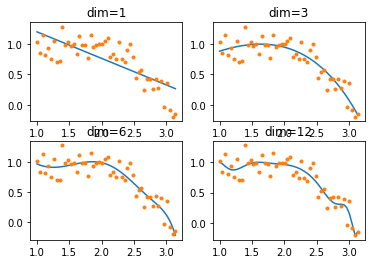

In [13]:
linear_regression()

分析上图：dim=1时，模型是直线，存在拟合不足；3和6时，比较接近sin()曲线的{1，pi]段；12时，曲线过于弯曲，存在过度拟合。

alpha的取值并没有一定之规。alpha的最佳设置取决与我们使用的特定数据集。增加alpha的值会降低特征变量的系数，使其趋于零，从而降低训练集的性能，但更有助于泛化。

存在问题：随着特征维度的增加，模型求得的参数w0,w1,....,wn的值显著增加，产生的原因就是最小二乘的公式

岭回归

alpha 1.000000e-15
intercept_ 74817.85953607719
coef_: [  21938.77283053 -293928.62672673  616786.10582069 -608863.93580414
  -84900.75972922  556429.8182088    35049.99451881 -546824.69380486
  -27081.28259265  630341.22736753 -454301.43634718  102417.21688644]
alpha 1.000000e-12
intercept_ -8982.070356849286
coef_: [ -3469.45375511  21863.25758492 -17278.44691312  -8354.43061809
  17576.4946195    9774.95430008 -14411.32751497 -14945.79345768
  10880.05753552  18968.91613505 -20677.2871322    5644.41947869]
alpha 1.000000e-05
intercept_ 0.6947334467511922
coef_: [-4.45987325 -0.36621903  0.97092322  1.5595334   1.10685865 -0.020561
 -1.09517233 -1.38635113 -0.55475986  0.97710965  1.71466792 -1.16530721]
alpha 1.000000e+00
intercept_ 0.7142737065298247
coef_: [ 1.96160527e-02  2.26969816e-02  3.52492619e-02  3.16074442e-02
  1.70647533e-02 -9.49871345e-05 -1.25040695e-02 -1.57332280e-02
 -9.40056569e-03  2.20619782e-03  9.78463900e-03 -1.16192429e-03]


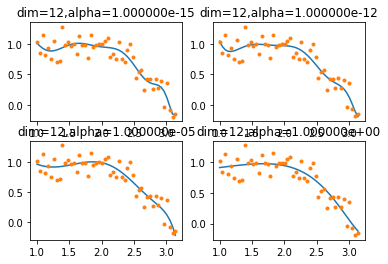

In [14]:
# 使用岭回归，采用上例12维度
def ridge_regression():
    alphas = [1e-15,1e-12,1e-5,1]    # a参数

    for idx,i in enumerate(alphas):
        plt.subplot(2, len(alphas)/2, idx+1)  # 初始化子图
        reg = linear_model.Ridge(alpha=i)  # 岭回归模型

        sub_x = x[:,0:12]   # 抽取全部12维的特征
        reg.fit(sub_x,y)    # 训练
        plt.plot(x[:,0], reg.predict(sub_x))
        plt.plot(x[:,0], y, '.')
        plt.title("dim=12,alpha=%e"%i)

        print("alpha %e"%i)
        print("intercept_ %s"% (reg.intercept_))
        print("coef_: %s"% (reg.coef_))
    plt.show()

ridge_regression()

Lasso回归

C:\Users\rosehyr\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6734122079251801, tolerance: 0.00058957405760624
  positive)
C:\Users\rosehyr\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.657743422711487, tolerance: 0.00058957405760624
  positive)


alpha 1.000000e-10
intercept_ :
coef_: [ 1.08695000e+00 -4.87566309e-01 -3.73761462e-02 -4.69143508e-03
 -2.47323266e-04  4.20593823e-04  4.38295139e-04  3.51318253e-04
  2.65814043e-04  1.99071827e-04  1.49863302e-04  1.14026848e-04]
alpha 1.000000e-03
intercept_ :
coef_: [ 5.05127846e-01  7.85715422e-04 -8.90767274e-02 -1.37905877e-02
 -1.88061119e-03 -1.14331711e-04  4.52550101e-04  4.41540063e-04
  3.43360917e-04  2.60542639e-04  1.97491412e-04  1.50816015e-04]
alpha 1.000000e+00
intercept_ :
coef_: [-0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.00157685 -0.         -0.         -0.          0.        ]
alpha 1.000000e+01
intercept_ :
coef_: [-0.        -0.        -0.        -0.        -0.        -0.
 -0.        -0.        -0.        -0.        -0.        -0.0004253]


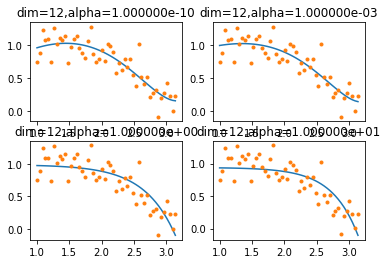

In [16]:
def lasso_regression():
    alphas = [1e-10,1e-3,1,10]       # a列表
    for idx,i in enumerate(alphas):
        plt.subplot(2,len(alphas)/2,idx+1)
        reg = linear_model.Lasso(alpha = i)    # 初始化Lasso对象
        sub_x = x[:,0:12]                      # 取全部12维的特征
        reg.fit(sub_x,y)                       # 进行训练
        plt.plot(x[:,0],reg.predict(sub_x))
        plt.plot(x[:,0],y,'.')
        plt.title("dim=12,alpha=%e"%i)

        print("alpha %e"%i)
        print("intercept_ :"% (reg.intercept_))
        print("coef_: %s"% (reg.coef_))
    plt.show()

lasso_regression()

Python range() 函数用法

range() 函数可创建一个整数列表，一般用在 for 循环中。
函数语法:range(start, stop[,step])
参数说明：
start: 计数从 start 开始。默认是从 0 开始。例如range（5）等价于range（0， 5）;
stop: 计数到 stop 结束，但不包括 stop。例如：range（0， 5） 是[0, 1, 2, 3, 4]没有5
step：步长，默认为1。例如：range（0， 5） 等价于 range(0, 5, 1)

In [47]:
#1、下面遍历一个列表
the_count=[1,2,3,4,5,6]
for number in the_count:
    print("this is count %d" % number)
print("--------------------")

this is count 1
this is count 2
this is count 3
this is count 4
this is count 5
this is count 6
--------------------


In [48]:
#2、遍历一个混合列表
list=[1,2,3,4,"zll",5,6,"hello",7,8.9]
for i in range(len(list)):
    print (list[i],end="、")
print("\n--------------------")

1、2、3、4、zll、5、6、hello、7、8.9、
--------------------


In [49]:
#3、用range()函数生成一个列表
for i in range(5):
    print(i,end="、")
print("\n--------------------")

0、1、2、3、4、
--------------------


In [50]:
#4、range(10),其中参数10代表：从0到10的一个序列，当然不包含10
print("range(10)表示：" ,range(10))
listA=[i for i in range(10)]
print(listA)
print("--------------------")

range(10)表示： range(0, 10)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
--------------------


In [51]:
#5、我们也可以自定义起始点和结束点
#我们定义了一个从5开始的起始点，到100结束的结束点
print("range(5,100)表示",range(5,100))
listB=[i for i in range(5,100)]
print(listB)
print("--------------------")

range(5,100)表示 range(5, 100)
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
--------------------


In [52]:
#6、定义了这些后，我们还可以定义步长
#我们定义一个从1开始到30结束，步长为3的列表
print('range(1,30,3)表示：',range(1,30,3))
listC = [i for i in range(1,30,3)]
print(listC)

range(1,30,3)表示： range(1, 30, 3)
[1, 4, 7, 10, 13, 16, 19, 22, 25, 28]


enumerate在字典上是枚举、列举的意思
对于一个可迭代的（iterable）/可遍历的对象（如列表、字符串），enumerate将其组成一个索引序列，利用它可以同时获得索引和值
enumerate多用于在for循环中得到计数
例如对于一个seq，得到：(0, seq[0]), (1, seq[1]), (2, seq[2])

enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，同时列出数据和数据下标，一般用在 for 循环当中
enumerate(sequence,[start=0])
参数
sequence 一个序列、迭代器或其他支持迭代的对象 （string、list 和 tuple 都属于 sequence（序列））
start 下标起始位置。默认为0
返回值
返回enumerate对象

In [54]:
l1 = [11,22,33,44,55]
em = enumerate(l1)
l2 = [i for i in em]
print(l2)

[(0, 11), (1, 22), (2, 33), (3, 44), (4, 55)]


In [55]:
l1 = [11,22,33,44,55]
em = enumerate(l1,start = 100)
l2 = [ i for i in em]
print(l2)

[(100, 11), (101, 22), (102, 33), (103, 44), (104, 55)]


In [57]:
list1 = ["这", "是", "一个", "测试"]
for index, item in enumerate(list1):
    print (index, item)


0 这
1 是
2 一个
3 测试
